In [59]:
import numpy as np
import matplotlib.pyplot as plt

#function we need

def matrix_multiply(A, B):
    # Ensure inputs are numpy arrays
    if not isinstance(A, np.ndarray) or not isinstance(B, np.ndarray):
        raise ValueError("Inputs must be of type numpy.ndarray")
    
    # Get dimensions of the matrices
    rows_A, cols_A = A.shape
    rows_B, cols_B = B.shape
    
    # Ensure the number of columns in A is equal to the number of rows in B
    if cols_A != rows_B:
        raise ValueError("Number of columns in A must be equal to the number of rows in B")
    
    # Initialize the result matrix with zeros
    result = np.zeros((rows_A, cols_B))
    
    # Perform matrix multiplication
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i, j] += A[i, k] * B[k, j]
    
    return result


def gauss_jordan_inverse(A):
    n = len(A)
    
    # Initialize the augmented matrix manually with the identity matrix
    augmented_matrix = np.zeros((n, 2 * n))
    
    # Fill in the augmented matrix with A on the left and identity on the right
    for i in range(n):
        for j in range(n):
            augmented_matrix[i][j] = A[i][j]
        augmented_matrix[i][i + n] = 1.0  # Identity matrix portion
    
    # Perform row operations to turn A into the identity matrix
    for i in range(n):
        # Pivot: make the diagonal element 1
        if augmented_matrix[i][i] == 0:
            raise ValueError("Matrix is singular and cannot be inverted.")
        augmented_matrix[i] = augmented_matrix[i] / augmented_matrix[i][i]
        
        # Make the other elements in the current column 0
        for j in range(n):
            if i != j:
                augmented_matrix[j] = augmented_matrix[j] - augmented_matrix[j][i] * augmented_matrix[i]
    
    # Extract the right part of the augmented matrix as the inverse
    inverse_matrix = augmented_matrix[:, n:]
    return inverse_matrix

#construct design matrix A (give n)
def design_matrix(x_list, n):
    # Create an empty matrix with len(x_list) rows and n columns
    matrix = np.zeros((len(x_list), n))
    
    # Fill in the matrix row by row
    for i in range(len(x_list)):  # Use a basic index loop
        x = x_list[i]
        for j in range(n):
            matrix[i, j] = x**j  # Fill each entry with x^j
    return matrix
    
def scalar_matrix(scalar_value, size):
    # Create an n x n matrix initialized with zeros
    scalar_matrix = np.zeros((size, size))
    
    # Set the diagonal elements to the scalar value
    for i in range(size):
        scalar_matrix[i, i] = scalar_value
    
    return scalar_matrix

def print_polynomial(coefficients):
    terms = []
    degree = len(coefficients) - 1
    
    for i, coeff in enumerate(coefficients):
        power = degree - i
        if power == 0:
            terms.append(f"{coeff[0]:.2f}")
        elif power == 1:
            terms.append(f"{coeff[0]:.2f}x")
        else:
            terms.append(f"{coeff[0]:.2f}x^{power}")
    
    polynomial = " + ".join(terms)
    return polynomial

#square error F
def total_error(X,A,b):
    return (matrix_multiply(matrix_multiply(X.T, A.T),matrix_multiply(A, X))-2*matrix_multiply(matrix_multiply(X.T, A.T), b) + matrix_multiply(b.T,b))[0][0]



In [30]:
# Load the data
file_path = "testfile.txt"
data = np.loadtxt(file_path, delimiter=',')

# Separate the data into two arrays, x and y
x_list, y_list = data[:, 0], data[:, 1]


In [62]:
#closed-form LSE approach

def closed_form_LSE(x_list, y_list, n, lambd):
    
    A = design_matrix(x_list, n)
    b = np.array(y_list).reshape(-1, 1)
    L = scalar_matrix(lambd, n)

    X = matrix_multiply(matrix_multiply(gauss_jordan_inverse(matrix_multiply(A.T, A) + L), A.T), b)

    Fitting_line = print_polynomial(X)

    # Create the fitted polynomial line
    fitting_line = matrix_multiply(A, X)

    # Plot the scatter plot and the fitted polynomial line

    print("LSE:")
    print("Fitting line:", Fitting_line)
    print("Total error:", total_error(X,A,b))

    plt.scatter(x_list, y_list, label='Data points')
    plt.plot(x_list, fitting_line, color='red', label='Fitted polynomial')
    plt.legend()
    plt.show()
    

In [67]:
#steepest descent method 

def steepest_descent(x_list, y_list, n, epochs): 
    #Initial point
    X = np.zeros((n, 1))
    
    #design marrix A
    A = design_matrix(x_list, n)
    
    #y_list
    b = np.array(y_list).reshape(-1, 1)
    
    #learn
    h = 0.001  # The learning Rate
    epochs = 10000  # The number of iterations to perform gradient descent

    ATA = matrix_multiply(A.T, A)
    ATb = matrix_multiply(A.T, b)

    for i in range(epochs):
        TX = 2*(matrix_multiply(ATA, X) - ATb)
        X = X - h * TX / (np.sum(np.abs(TX)) + 1e-8) # L1 norm

    #solution the line  X 

    Fitting_line = print_polynomial(X)

    # Create the fitted polynomial line
    fitting_line = matrix_multiply(A, X)

    print("Steepest Gradient Descent:",)
    print("Fitting line:",Fitting_line)
    print("Total error:", total_error(X,A,b))


    # Plot the scatter plot and the fitted polynomial line
    plt.scatter(x_list, y_list, label='Data points')
    plt.plot(x_list, fitting_line, color='red', label='Fitted polynomial')
    plt.legend()
    plt.show()

In [87]:
#Newton's Method

def Newton_Method(x_list, y_list, n, lambd):
    A = design_matrix(x_list, n)
    b = np.array(y_list).reshape(-1, 1)
    L = scalar_matrix(lambd, n)

    #Initial point 
    X = np.zeros((n, 1))

    ATA = matrix_multiply(A.T, A)
    ATb = matrix_multiply(A.T, b)
    
    epochs = 10
    for i in range(epochs):
        TX = 2*(matrix_multiply(ATA, X) - ATb)
        X = X - matrix_multiply(gauss_jordan_inverse(2*ATA + L), TX)

    #solution the line  X 

    Fitting_line = print_polynomial(X)

    # Create the fitted polynomial line
    fitting_line = matrix_multiply(A, X)

    print("Newton's Method:",)
    print("Fitting line:",Fitting_line)
    print("Total error:", total_error(X,A,b))


    # Plot the scatter plot and the fitted polynomial line
    plt.scatter(x_list, y_list, label='Data points')
    plt.plot(x_list, fitting_line, color='red', label='Fitted polynomial')
    plt.legend()
    plt.show()


Steepest Gradient Descent:
Fitting line: 6.32x + 3.68
Total error: 28487.504485508674


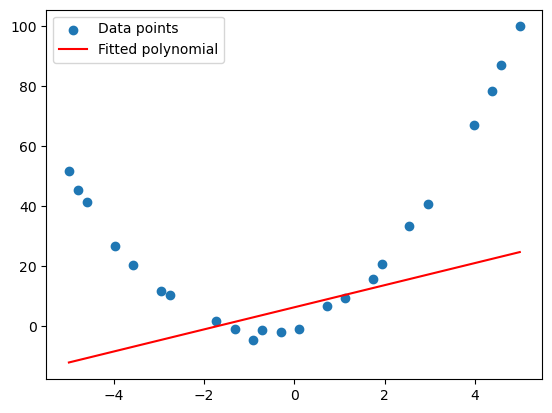

In [73]:
steepest_descent(x_list, y_list, 2, 1000)

LSE:
Fitting line: 29.31x + 4.43
Total error: 16335.123164957968


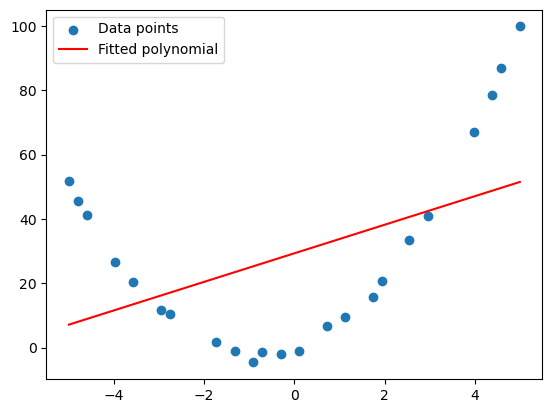

Newton's Method:
Fitting line: 29.31x + 4.43
Total error: 16335.123164957968


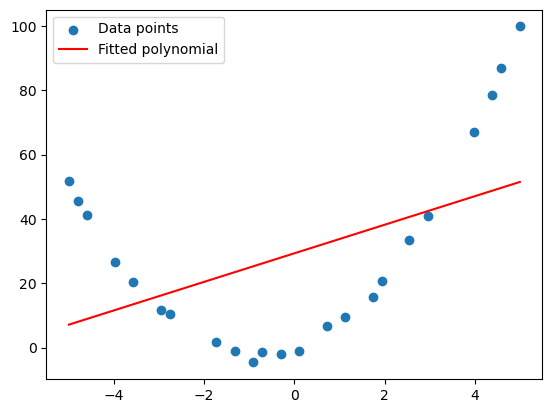

In [74]:
closed_form_LSE(x_list, y_list, 2, 0)
Newton_Method(x_list, y_list, 2, 0)

LSE:
Fitting line: -0.23x^2 + 4.91x + 3.02
Total error: 26.55995949934004


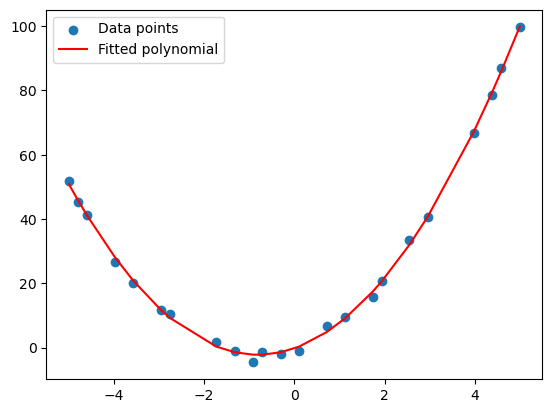

Newton's Method:
Fitting line: -0.23x^2 + 4.91x + 3.02
Total error: 26.559959499347315


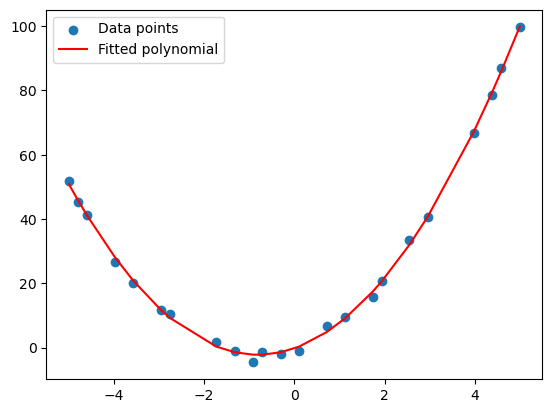

In [89]:
closed_form_LSE(x_list, y_list, 3, 0)
Newton_Method(x_list, y_list, 3, 0)

LSE:
Fitting line: 0.04x^2 + 4.50x + 2.99
Total error: 65.19626911244995


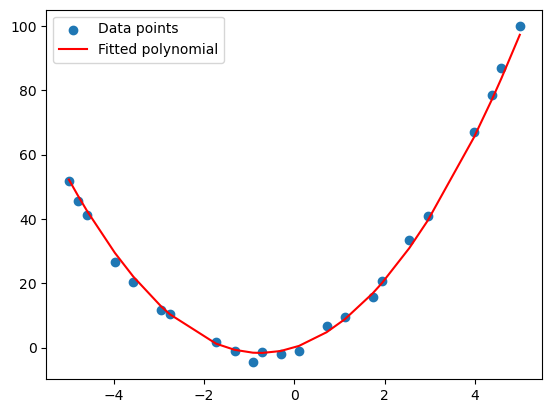

Newton's Method:
Fitting line: -0.23x^2 + 4.91x + 3.02
Total error: 26.559960766106087


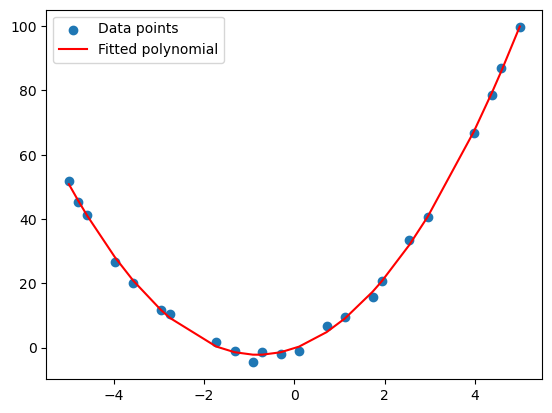

In [101]:
# Newton_Method compare to LSE 
closed_form_LSE(x_list, y_list, 3, 20)
Newton_Method(x_list, y_list, 3, 20)

#large lambda Newton_Method can get better result.

LSE:
Fitting line: -1.15x^24 + 3.85x^23 + 8.22x^22 + 9.11x^21 + -6.15x^20 + -10.68x^19 + 2.59x^18 + 4.79x^17 + -0.46x^16 + -1.06x^15 + 0.04x^14 + 0.12x^13 + -0.00x^12 + -0.01x^11 + 0.00x^10 + 0.00x^9 + -0.00x^8 + 0.00x^7 + 0.00x^6 + -0.00x^5 + -0.00x^4 + 0.00x^3 + 0.00x^2 + -0.00x + 0.00
Total error: 7218.34647964716


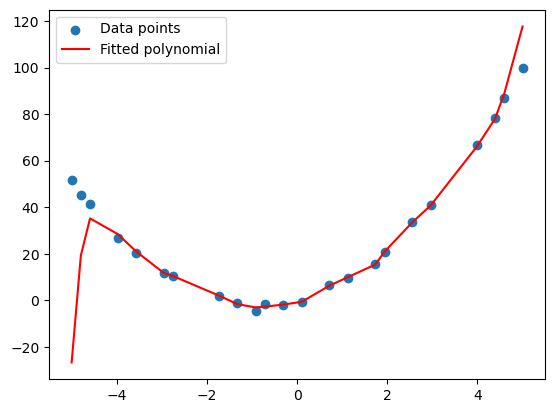

Newton's Method:
Fitting line: -1.19x^24 + 4.03x^23 + 9.04x^22 + 8.32x^21 + -8.23x^20 + -9.48x^19 + 4.51x^18 + 3.93x^17 + -1.31x^16 + -0.73x^15 + 0.24x^14 + 0.05x^13 + -0.03x^12 + 0.00x^11 + 0.00x^10 + -0.00x^9 + -0.00x^8 + 0.00x^7 + -0.00x^6 + -0.00x^5 + 0.00x^4 + 0.00x^3 + -0.00x^2 + -0.00x + 0.00
Total error: 1183200.1691783238


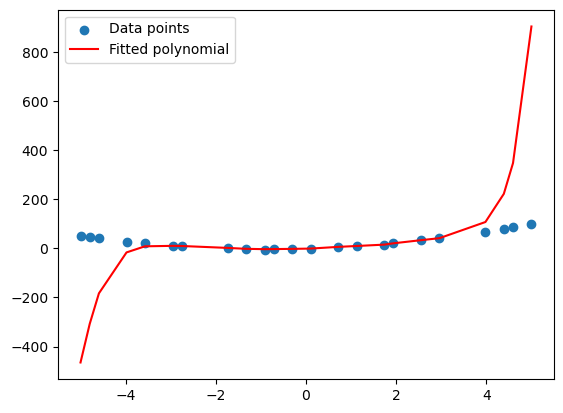

LSE:
Fitting line: -1.17x^25 + 3.24x^24 + 8.31x^23 + 11.62x^22 + -6.25x^21 + -13.91x^20 + 2.53x^19 + 6.65x^18 + -0.35x^17 + -1.62x^16 + -0.02x^15 + 0.22x^14 + 0.01x^13 + -0.02x^12 + -0.00x^11 + 0.00x^10 + 0.00x^9 + -0.00x^8 + 0.00x^7 + 0.00x^6 + -0.00x^5 + -0.00x^4 + 0.00x^3 + 0.00x^2 + -0.00x + -0.00
Total error: 5179.427143014858


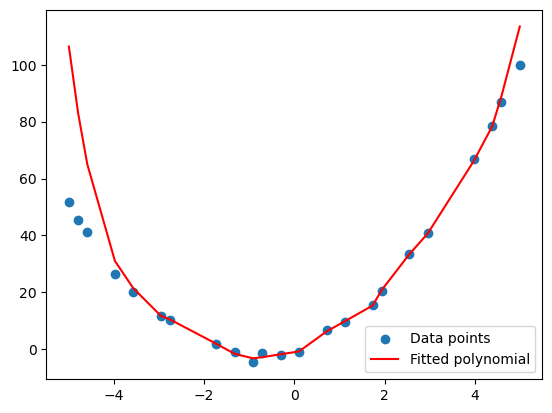

Newton's Method:
Fitting line: -1.08x^25 + 3.97x^24 + 7.06x^23 + 8.75x^22 + -3.31x^21 + -10.53x^20 + -0.05x^19 + 4.92x^18 + 0.74x^17 + -1.17x^16 + -0.26x^15 + 0.16x^14 + 0.04x^13 + -0.01x^12 + -0.00x^11 + 0.00x^10 + 0.00x^9 + -0.00x^8 + 0.00x^7 + 0.00x^6 + -0.00x^5 + -0.00x^4 + 0.00x^3 + 0.00x^2 + -0.00x + -0.00
Total error: 761523048.2483646


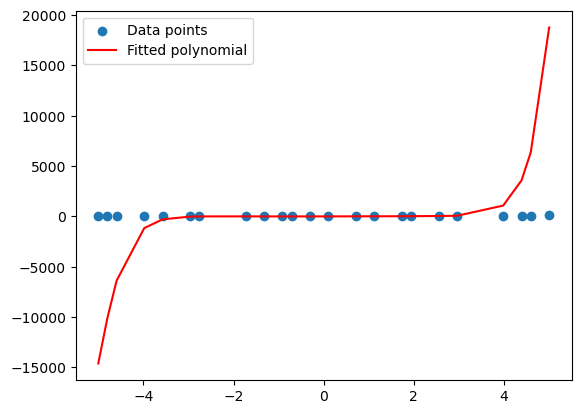

LSE:
Fitting line: -1.28x^26 + 1.94x^25 + 9.24x^24 + 17.17x^23 + -7.57x^22 + -21.21x^21 + 2.95x^20 + 10.93x^19 + -0.19x^18 + -2.92x^17 + -0.14x^16 + 0.44x^15 + 0.04x^14 + -0.04x^13 + -0.00x^12 + 0.00x^11 + 0.00x^10 + -0.00x^9 + -0.00x^8 + 0.00x^7 + 0.00x^6 + -0.00x^5 + -0.00x^4 + 0.00x^3 + 0.00x^2 + -0.00x + -0.00
Total error: 158506.21233828735


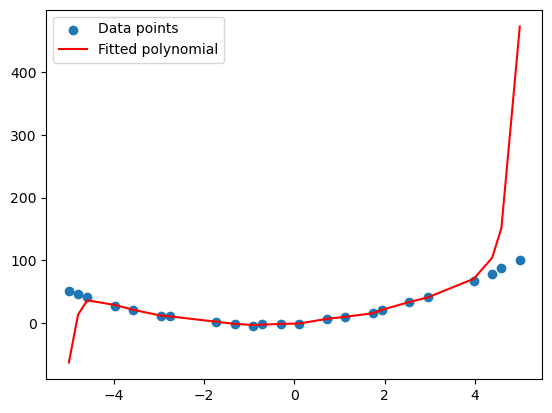

Newton's Method:
Fitting line: 1063.76x^26 + 17429.63x^25 + -4445.57x^24 + -73963.04x^23 + -2547.81x^22 + 97716.57x^21 + 13204.39x^20 + -57654.69x^19 + -10453.37x^18 + 17661.10x^17 + 3651.78x^16 + -2970.33x^15 + -662.17x^14 + 273.33x^13 + 64.10x^12 + -12.89x^11 + -3.13x^10 + 0.31x^9 + 0.07x^8 + -0.02x^7 + -0.00x^6 + 0.00x^5 + 0.00x^4 + -0.00x^3 + -0.00x^2 + 0.00x + 0.00
Total error: 16033385788.245996


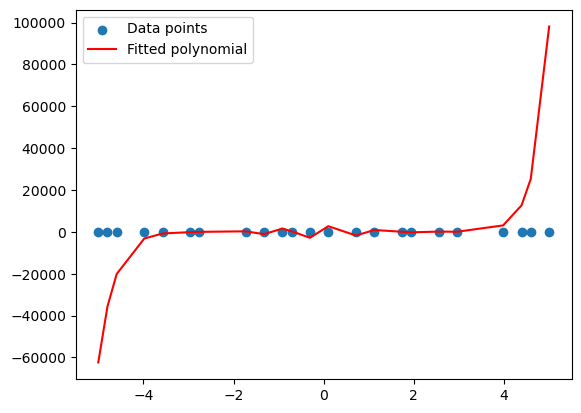

LSE:
Fitting line: -0.92x^27 + 5.96x^26 + 5.60x^25 + 0.63x^24 + -0.75x^23 + -0.38x^22 + -1.45x^21 + -0.65x^20 + 0.89x^19 + 0.40x^18 + -0.16x^17 + -0.08x^16 + 0.01x^15 + 0.01x^14 + 0.00x^13 + -0.00x^12 + -0.00x^11 + -0.00x^10 + 0.00x^9 + -0.00x^8 + -0.00x^7 + 0.00x^6 + 0.00x^5 + -0.00x^4 + -0.00x^3 + -0.00x^2 + 0.00x + 0.00
Total error: 83610.06971497551


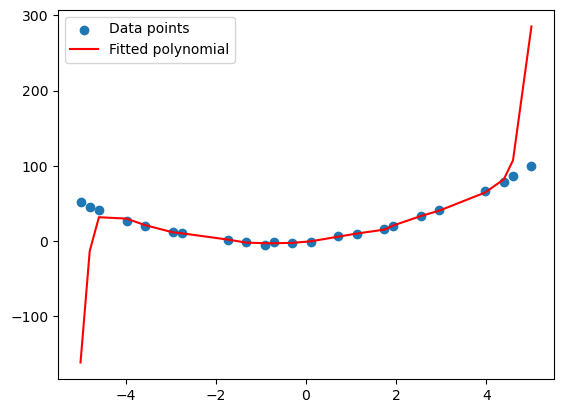

Newton's Method:
Fitting line: -1.21x^27 + 3.52x^26 + 9.25x^25 + 10.76x^24 + -8.47x^23 + -12.99x^22 + 4.39x^21 + 6.42x^20 + -1.08x^19 + -1.61x^18 + 0.13x^17 + 0.23x^16 + -0.01x^15 + -0.02x^14 + -0.00x^13 + 0.00x^12 + 0.00x^11 + -0.00x^10 + 0.00x^9 + 0.00x^8 + -0.00x^7 + -0.00x^6 + 0.00x^5 + 0.00x^4 + -0.00x^3 + -0.00x^2 + 0.00x + -0.00
Total error: 2208731534923.8076


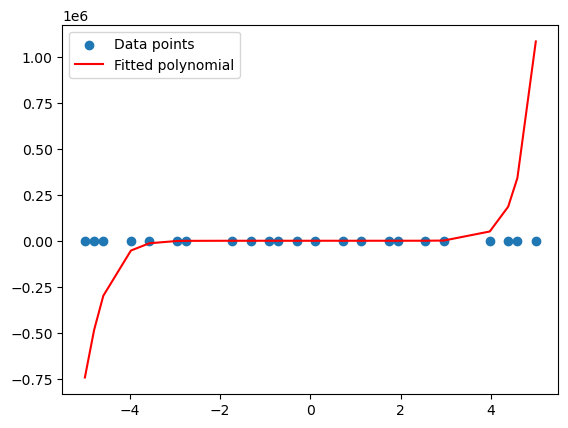

LSE:
Fitting line: -1.18x^28 + 4.08x^27 + 9.26x^26 + 7.67x^25 + -9.21x^24 + -8.01x^23 + 5.60x^22 + 2.72x^21 + -1.76x^20 + -0.28x^19 + 0.30x^18 + -0.03x^17 + -0.03x^16 + 0.01x^15 + 0.00x^14 + -0.00x^13 + 0.00x^12 + 0.00x^11 + -0.00x^10 + 0.00x^9 + 0.00x^8 + -0.00x^7 + -0.00x^6 + 0.00x^5 + 0.00x^4 + -0.00x^3 + -0.00x^2 + 0.00x + 0.00
Total error: 440040.942017034


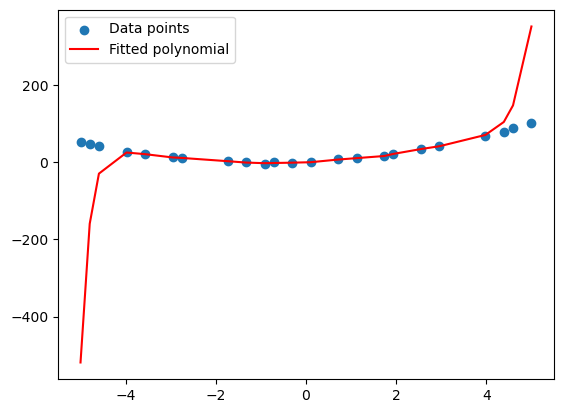

Newton's Method:
Fitting line: 935883.41x^28 + 4703787.47x^27 + -14219515.53x^26 + -17586380.48x^25 + 33349863.16x^24 + 18191732.39x^23 + -28258239.36x^22 + -7241750.29x^21 + 10925755.65x^20 + 1116258.89x^19 + -2063219.07x^18 + -8136.10x^17 + 177169.58x^16 + -17269.59x^15 + -2108.44x^14 + 1953.53x^13 + -701.22x^12 + -64.86x^11 + 42.35x^10 + -2.27x^9 + -0.77x^8 + 0.22x^7 + 0.06x^6 + -0.01x^5 + -0.01x^4 + 0.00x^3 + 0.00x^2 + 0.00x + -0.00
Total error: 520072298503386.94


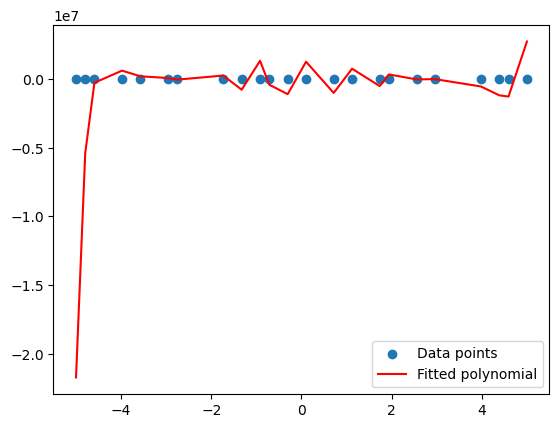

In [100]:
# Newton_Method compare to LSE 

for n in range(25,30):
    closed_form_LSE(x_list, y_list, n, 0)
    Newton_Method(x_list, y_list, n, 0)

#Newton's Method is more prone to overfitting
